In this notebook we take the complete dataset to train the neural network

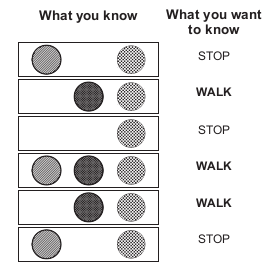

In [9]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array([[ 1, 0, 1 ],
                        [ 0, 1, 1 ],
                        [ 0, 0, 1 ],
                        [ 1, 1, 1 ],
                        [ 0, 1, 1 ],
                        [ 1, 0, 1 ] ] )
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

import pandas as pd
# create dataframe using streetlights and walk_vs_stop
df = pd.DataFrame({
    'streetlight_1': streetlights[:, 0],
    'streetlight_2': streetlights[:, 1],
    'streetlight_3': streetlights[:, 2],
    'walk_vs_stop': walk_vs_stop
})
df

,streetlight_1,streetlight_2,streetlight_3,walk_vs_stop
0,1,0,1,0
1,0,1,1,1
2,0,0,1,0
3,1,1,1,1
4,0,1,1,1
5,1,0,1,0


In [10]:
iteration_x = []
error_y = []

def neural_network(inputs, outputs):
    weights = np.array([0.5,0.48,-0.7])
    alpha = 0.0001
    overall_error = 0

    print(weights)
    for iteration in range(500):
        overall_error = 0
        for row in range(len(inputs)):
            row = 0
            x = inputs[row]
            y = outputs[row]
            pred = np.dot(x,weights)

            error = (pred - y) ** 2
            delta = pred - y
            weighted_delta = delta * x
            prev_weights = weights
            weights = weights - weighted_delta * alpha
            
            
            # print('predicted=%f, target=%f, error=%f, wieghts=%s, per=%s' % (pred, y, error, weights, percentage))

            print(f'predicted={pred:10.5f}, target={y:10.5f}, error={error:10.5f}, weights={weights}')

            overall_error = overall_error + error #Appending error
            
        print("=============Iteration=%f , error=%f ===================" %(iteration, overall_error))
        #Comment the below lines only added for graphs
        error_y.append(overall_error)
        iteration_x.append(iteration)

neural_network(streetlights,walk_vs_stop)

[ 0.5   0.48 -0.7 ]
predicted=  -0.20000, target=   0.00000, error=   0.04000, weights=[ 0.50002  0.48    -0.69998]
predicted=  -0.19996, target=   0.00000, error=   0.03998, weights=[ 0.50004  0.48    -0.69996]
predicted=  -0.19992, target=   0.00000, error=   0.03997, weights=[ 0.50005999  0.48       -0.69994001]
predicted=  -0.19988, target=   0.00000, error=   0.03995, weights=[ 0.50007998  0.48       -0.69992002]
predicted=  -0.19984, target=   0.00000, error=   0.03994, weights=[ 0.50009996  0.48       -0.69990004]
predicted=  -0.19980, target=   0.00000, error=   0.03992, weights=[ 0.50011994  0.48       -0.69988006]
=============Iteration=0.000000 , error=0.239760 ===================
predicted=  -0.19976, target=   0.00000, error=   0.03990, weights=[ 0.50013992  0.48       -0.69986008]
predicted=  -0.19972, target=   0.00000, error=   0.03989, weights=[ 0.50015989  0.48       -0.69984011]
predicted=  -0.19968, target=   0.00000, error=   0.03987, weights=[ 0.50017986  0.48    

In [11]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=iteration_x, y=error_y, mode='markers'))
fig.show()